<a href="https://colab.research.google.com/github/praveenraghuvanshi1512/EIP4/blob/master/Session1/Assignment1/EIP4_A1_Praveen_Raghuvanshi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EIP-4 Assignment - I [Praveen Raghuvanshi]

### Problem Definition

1. Visit this [link](https://colab.research.google.com/drive/1gZYwZdkgXBJRr624SqWJ9f452BmKNkNT#scrollTo=7eRM0QWN83PV). Take sometime to understand the code. 
2. Change the model in such a way that after executing the code below, your accuracy print out is more than 99.0
    1. score = model.evaluate(X_text, Y_text, verbose=0)
    2. print(score)
3. Once you are done, upload the code to your GitHub Repo. (Use this link to learn how to use GitHub). 


### Pre-Analysis
- MNIST dataset containing hand-written digits 0-9
- Total images : 70000
- Training images : 60000
- Test images : 10000
- Image size : 28 x 28 
- Channel : 1 (Black and White)
- Each image is an 28 x 28 array with (28 x 28 = 784) pixels
- Value of each pixel varies between 0-1 with zero representing white and 1 representing black
- Image size is small, MP could be applied at initial layer

## Summary/Results

Runtime: GPU

| S.No | Iteration | # Layers | Kernel(Initial) | MP | # Epochs | Batch Size | # Parameters | Acc | Test Acc | Time/Epoch | Analysis |
|------|-----------|----------|-----------------|----|----------|------------|--------------|-----|---------|------|----------|
| 1    | Default   | 6        |   3x3           | -- | 10       |  32        |    68,260     |99.62| 98.29    | 18s| [Reference](https://colab.research.google.com/drive/1gZYwZdkgXBJRr624SqWJ9f452BmKNkNT#scrollTo=TzdAYg1k9K7Z)         |
| 2    | Zero      | 6        |   3x3           | -- | 10       |  32        |    68,260     |92.55| 92.53    | 13s| Same as [Reference](https://colab.research.google.com/drive/1gZYwZdkgXBJRr624SqWJ9f452BmKNkNT#scrollTo=TzdAYg1k9K7Z) Acc Reduced
| 3    | First      | same        |   same           | -- | same       |  same        |    same     |99.59| 98.03    | 7s| Same as [Reference](https://colab.research.google.com/drive/1gZYwZdkgXBJRr624SqWJ9f452BmKNkNT#scrollTo=TzdAYg1k9K7Z) Acc increased just by running again. Time reduced |
| 4    | Second      | 11        |   same           | -- | same       |  same        |    6,323,476     |99.65| 98.9    | 51s| Layers increased(6 -> 11), Acc improved. Time increased, Parameters increased by 10 times,  |
| 5    | Third      | same        |   same           | -- | 30       |  same        |    6,323,476     |99.72| 99.08    | 51s| Epochs increased(10 -> 30), Acc improved. Crossed 99%

#### Results
- Accuracy crossed 99% - 99.08%
   - Increased layer 6 -> 11
   - Increased Epochs 10 -> 30


# **Import Libraries and modules**

In [0]:
# Install keras
# https://keras.io/
!pip install -q keras
import keras

In [0]:
# Import packages

import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
# Load MNIST dataset into train and test dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)
Image size : (28, 28)


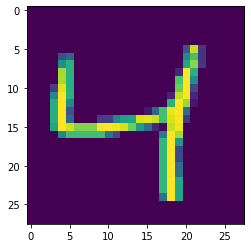

In [0]:
# Print an image just to check if it's a number

print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[2])

print('Image size : ' + str(X_train[5].shape))

In [0]:
# Re-shape image to a tensor with 1 channel(Black/White)
# https://datascience.stackexchange.com/questions/11704/reshaping-of-data-for-deep-learning-using-keras
# The Convolution2D layers in Keras however, are designed to work with 3 dimensions per example. 
# They have 4-dimensional inputs and outputs. This covers colour images (nb_samples, nb_channels, width, height), 
# but more importantly, it covers deeper layers of the network, where each example has become a set of feature maps i.e. (nb_samples, nb_features, width, height)

X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

print(X_train.shape)

(60000, 28, 28, 1)


In [0]:
# Convert to float and divide by 255 in order to normalize data between 0 and 1

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(10, 1, activation='relu'))
model.add(Convolution2D(10, 26))
model.add(Flatten())
model.add(Activation('softmax'))

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 10)        330       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 1, 1, 10)          67610     
_________________________________________________________________
flatten_1 (Flatten)          (None, 10)                0         
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 68,260
Trainable params: 68,260
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.




Epoch 1/10





60000/60000 [==============================] - 15s 246us/step - loss: 0.1986 - acc: 0.9426
Epoch 2/10
60000/60000 [==============================] - 7s 120us/step - loss: 0.0746 - acc: 0.9777
Epoch 3/10
60000/60000 [==============================] - 7s 120us/step - loss: 0.0550 - acc: 0.9830
Epoch 4/10
60000/60000 [==============================] - 7s 120us/step - loss: 0.0432 - acc: 0.9860
Epoch 5/10
60000/60000 [==============================] - 7s 119us/step - loss: 0.0360 - acc: 0.9885
Epoch 6/10
60000/60000 [==============================] - 7s 120us/step - loss: 0.0286 - acc: 0.9908
Epoch 7/10
60000/60000 [==============================] - 7s 122us/step - loss: 0.0231 - acc: 0.9923
Epoch 8/10
60000/60000 [==============================] - 7s 120us/step - loss: 0.0176 - acc: 0.9946
Epoch 9/10
60000/60000 [==============================] - 8s 127us/step - loss: 0.0147 - acc: 0.9953
Epoch 10/10
60000/60000 [==============================] - 7s 122us/step - loss: 0.

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

[0.08028831945906495, 0.9803]


In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[1.01747568e-18 1.45716654e-18 6.95848674e-12 4.25954063e-08
  1.92996524e-21 9.55466466e-17 4.09596628e-32 1.00000000e+00
  5.07196975e-12 2.64556155e-11]
 [8.29881519e-13 1.14739555e-12 1.00000000e+00 5.75438609e-14
  4.05101709e-22 1.28463717e-16 5.86776183e-09 1.57983053e-22
  2.68632616e-11 2.49259478e-19]
 [5.69900891e-08 9.99699712e-01 3.94958590e-07 6.83352619e-09
  2.82430789e-04 5.36728137e-08 1.74730026e-08 7.51701236e-06
  9.91232719e-06 1.21809807e-09]
 [9.99999523e-01 2.79658185e-19 4.17604213e-07 6.64224331e-14
  9.67750197e-18 1.87383190e-13 7.80092865e-11 4.70214631e-11
  5.58515907e-12 1.01595905e-10]
 [1.09718829e-14 3.29788810e-16 1.71076313e-11 9.49600884e-11
  9.99999762e-01 2.16774853e-15 9.60804041e-14 1.04412217e-11
  2.58952804e-10 2.58158451e-07]
 [2.16947987e-10 9.99834299e-01 8.58085603e-09 2.74332335e-09
  1.54467289e-05 7.46809281e-11 1.59796634e-10 1.40762757e-04
  9.35835942e-06 3.54398566e-10]
 [4.95372361e-19 4.08065422e-12 5.24396038e-09 3.01771390e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_1'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))


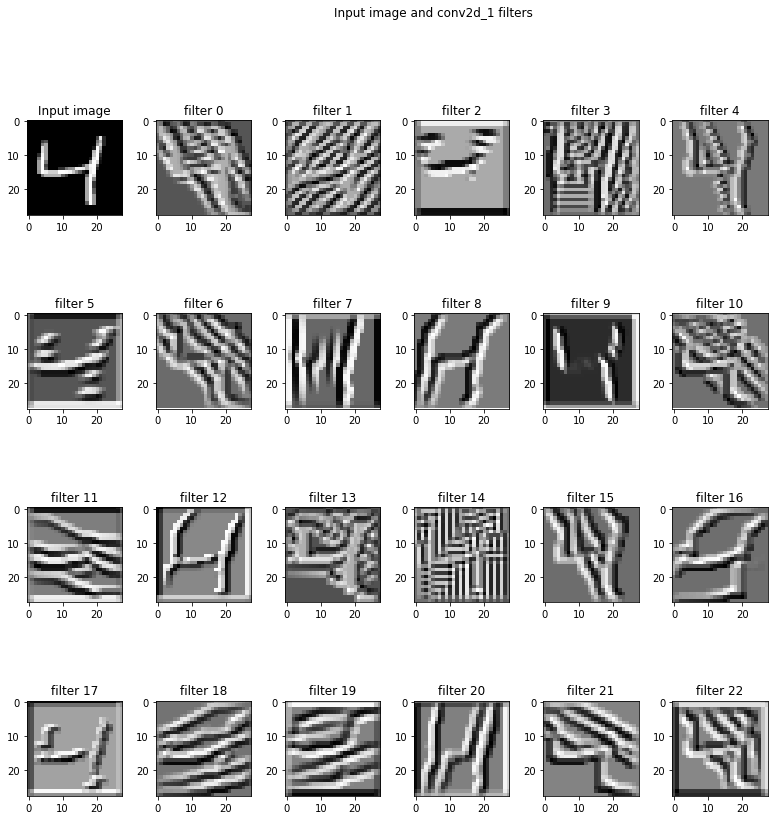

In [0]:
# Display image in a layer
vis_img_in_filter(layer_name = 'conv2d_1')

## Iteration - Second
- Increase colvolution layer to 10

In [0]:
from keras.layers import Activation
model = Sequential()
 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1))) # 26

model.add(Convolution2D(64, 3, activation='relu')) # 24
model.add(Convolution2D(128, 3, activation='relu')) # 22
model.add(Convolution2D(256, 3, activation='relu')) # 20
model.add(Convolution2D(512, 3, activation='relu')) # 18
model.add(Convolution2D(1024, 3, activation='relu')) # 16

model.add(Convolution2D(10, 1, activation='relu')) # 16 
model.add(Convolution2D(10, 16))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.


In [0]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 22, 22, 128)       73856     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 20, 20, 256)       295168    
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 18, 18, 512)       1180160   
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 16, 16, 1024)      4719616   
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 16, 16, 10)       

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

Epoch 1/10
  160/60000 [..............................] - ETA: 56s - loss: 0.0060 - acc: 1.0000

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


60000/60000 [==============================] - 52s 861us/step - loss: 0.0139 - acc: 0.9955
Epoch 2/10
60000/60000 [==============================] - 52s 862us/step - loss: 0.0149 - acc: 0.9952
Epoch 3/10
60000/60000 [==============================] - 51s 856us/step - loss: 0.0124 - acc: 0.9958
Epoch 4/10
60000/60000 [==============================] - 51s 858us/step - loss: 0.0094 - acc: 0.9968
Epoch 5/10
60000/60000 [==============================] - 52s 858us/step - loss: 0.0134 - acc: 0.9958
Epoch 6/10
60000/60000 [==============================] - 51s 855us/step - loss: 0.0112 - acc: 0.9963
Epoch 7/10
60000/60000 [==============================] - 51s 853us/step - loss: 0.0099 - acc: 0.9970
Epoch 8/10
60000/60000 [==============================] - 51s 854us/step - loss: 0.0090 - acc: 0.9973
Epoch 9/10
60000/60000 [==============================] - 51s 853us/step - loss: 0.0109 - acc: 0.9966
Epoch 10/10
60000/60000 [==============================] - 51s 854us/step - loss: 0.0116 - ac

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

[0.0607988017551791, 0.989]


## Iteration - Third
- Increase No of epochs(10->30)
- No of layers and other things same as previous iteration

In [0]:
from keras.layers import Activation
model = Sequential()
 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1))) # 26

model.add(Convolution2D(64, 3, activation='relu')) # 24
model.add(Convolution2D(128, 3, activation='relu')) # 22
model.add(Convolution2D(256, 3, activation='relu')) # 20
model.add(Convolution2D(512, 3, activation='relu')) # 18
model.add(Convolution2D(1024, 3, activation='relu')) # 16

model.add(Convolution2D(10, 1, activation='relu')) # 16 
model.add(Convolution2D(10, 16))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.


In [0]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 22, 22, 128)       73856     
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 20, 20, 256)       295168    
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 18, 18, 512)       1180160   
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 16, 16, 1024)      4719616   
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 16, 16, 10)       

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=30, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/30
60000/60000 [==============================] - 53s 888us/step - loss: 0.1590 - acc: 0.9523
Epoch 2/30
60000/60000 [==============================] - 52s 868us/step - loss: 0.0627 - acc: 0.9811
Epoch 3/30
60000/60000 [==============================] - 52s 863us/step - loss: 0.0487 - acc: 0.9853
Epoch 4/30
60000/60000 [==============================] - 51s 857us/step - loss: 0.0395 - acc: 0.9873
Epoch 5/30
60000/60000 [==============================] - 51s 855us/step - loss: 0.0333 - acc: 0.9895
Epoch 6/30
60000/60000 [==============================] - 51s 856us/step - loss: 0.0278 - acc: 0.9911
Epoch 7/30
60000/60000 [==============================] - 51s 854us/step - loss: 0.0219 - acc: 0.9929
Epoch 8/30
60000/60000 [==============================] - 51s 853us/step - loss: 0.0201 - acc: 0.9933
Epoch 9/30
60000/60000 [==============================] - 51s 850us/step - loss: 0.0166 - acc: 0.9946
Epoch 10/30
60000/60000 [==============================] - 51s 852us/step - loss: 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

[0.05172299045256509, 0.9908]


In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[1.26609128e-24 7.35410632e-29 4.57749522e-16 3.28229015e-15
  1.03791419e-36 3.21803466e-28 0.00000000e+00 1.00000000e+00
  1.29795506e-26 9.20722167e-18]
 [4.41465251e-13 5.82438807e-16 1.00000000e+00 5.36693736e-27
  5.67963520e-26 2.31498570e-33 4.49163855e-20 4.01374074e-32
  4.61509025e-22 1.98274702e-36]
 [1.84225679e-17 1.00000000e+00 2.13056739e-10 9.80493899e-23
  3.42681890e-11 2.72783454e-14 5.55347358e-16 1.09382199e-11
  8.54501542e-14 1.46542439e-15]
 [1.00000000e+00 1.76787523e-30 1.65920488e-18 2.10323491e-23
  1.14657974e-23 2.71220029e-16 2.31957856e-10 9.49522289e-24
  1.49606533e-17 4.30021784e-19]
 [2.11954850e-27 1.25154676e-23 1.35782513e-32 6.58188253e-27
  1.00000000e+00 5.78769682e-28 4.63134248e-18 4.11767241e-28
  2.15648409e-21 7.26191568e-14]
 [6.23914315e-19 1.00000000e+00 3.12812692e-11 4.73656296e-25
  6.23191039e-12 1.82105265e-15 6.47932890e-17 8.92100738e-13
  1.27970402e-13 5.33630672e-15]
 [0.00000000e+00 5.93112643e-19 5.48347747e-24 5.28902643e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_1'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))


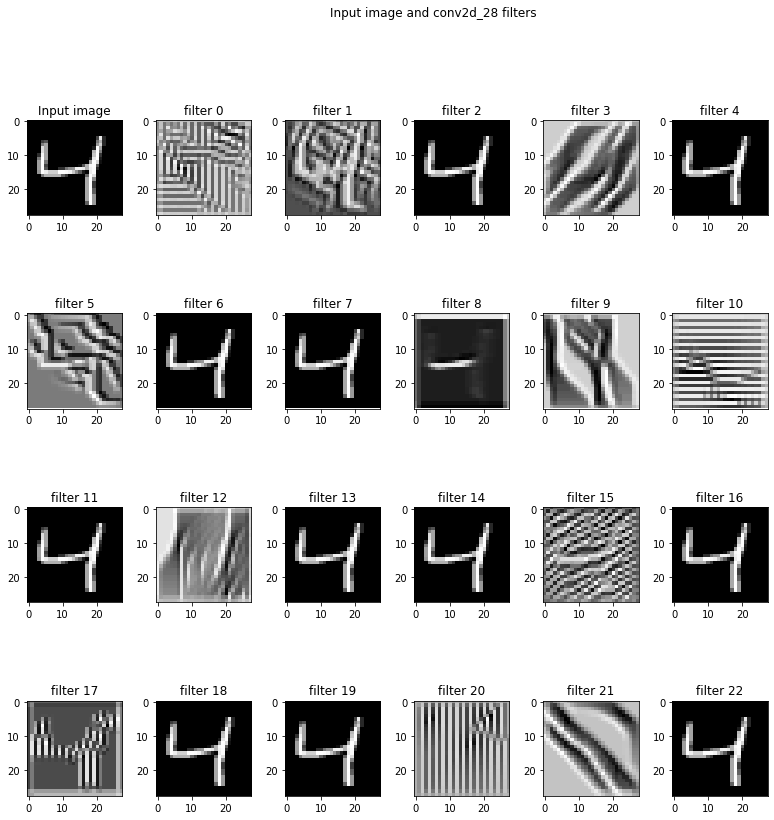

In [0]:
# Display image in a layer
vis_img_in_filter(layer_name = 'conv2d_28')